# Installing and loading required libraries

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express

from fredapi import Fred

plt.style.use('fivethirtyeight')

%matplotlib inline

# Initiate the FRED Object

In [206]:
fred = Fred(api_key=FRED_API_KEY)

# Search for economic data

In [207]:
data = fred.search("S&P", order_by='popularity')

In [208]:
data.shape

(1000, 15)

In [209]:
data.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-02-28,2024-02-28,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-02-27,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-02-27 21:27:02-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-02-28,2024-02-28,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2023-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-02-27 08:14:02-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-02-28,2024-02-28,S&P 500,2014-02-28,2024-02-27,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-02-27 19:10:58-06:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-02-28,2024-02-28,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-02-28,2024-02-28,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-02-27,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-02-27 21:27:06-06:00,82,This data represents the effective yield of th...


# Plot the pulled data

In [210]:
MEHOINUSA672N = fred.get_series(series_id='MEHOINUSA672N')
MEHOINUSA672N.head()

1984-01-01    56780.0
1985-01-01    57860.0
1986-01-01    60010.0
1987-01-01    60760.0
1988-01-01    61210.0
dtype: float64

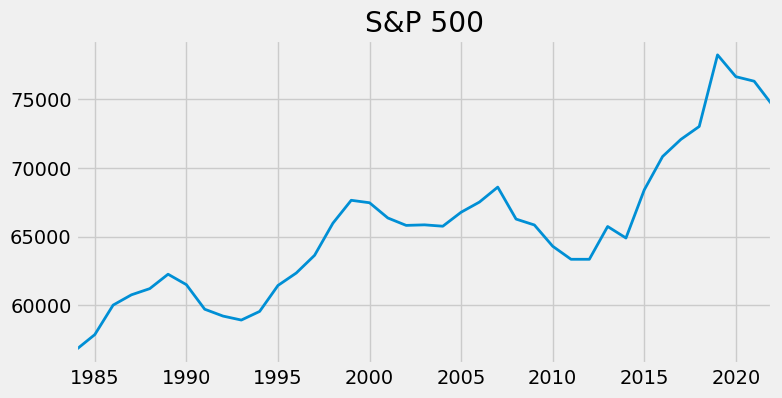

In [211]:
MEHOINUSA672N.plot(figsize=(8, 4), title="S&P 500", lw=2)
plt.show()

# Pull multiple data series and merge the data series to analyse the behaviour for unemployment rate

In [212]:
umemployment = fred.search("unemployment")

In [213]:
umemployment.head(1)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-02-28,2024-02-28,Unemployment Rate,1948-01-01,2024-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-02-02 07:49:02-06:00,95,The unemployment rate represents the number of...


## Search and Filter the FRED data series

In [214]:
umemployment_rate = fred.search("unemployment state", filter=("frequency", "Monthly"))

## Filter using columns and data

In [215]:
umemployment_rate = umemployment_rate.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'")

In [216]:
umemployment_rate = umemployment_rate.loc[umemployment_rate['title'].str.contains("Unemployment Rate")]

In [217]:
umemployment_rate.shape

(100, 15)

## Iterate through all series get data and concat into a single DataFrame

In [218]:
all_data = []
for id in umemployment_rate.index:
  data = fred.get_series(id)
  data = data.to_frame(name=id)
  all_data.append(data)

In [219]:
umemployment_data = pd.concat(all_data, axis=1)

In [220]:
umemployment_data.shape

(1126, 100)

In [221]:
umemployment_data.head()

,UNRATE,LNS14000006,CAUR,TXUR,M0892AUSM156SNBR,LNS14000024,LNS14000031,M0892BUSM156SNBR,NYUR,U2RATE,...,CWSTUR,LNS14000026,CNEWUR,LNS14000048,LRUNTTTTUSM156S,LNS14000089,M08320USM156SNBR,LRUN25TTUSM156S,LNS14000150,LNS14023705
1929-04-01,NaN,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
cols_to_drop = []
for i in umemployment_data:
  if len(i) > 4:
    cols_to_drop.append(i)

umemployment_data = umemployment_data.drop(columns=cols_to_drop, axis=1)

## Create a duplicate data frame, drop duplicates, change column name to States name

In [223]:
copy = umemployment_data.copy()
umemployment_state = copy.dropna()

umemployment_state.columns

Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
       'ILUR', 'NCUR', 'NJUR', 'GAUR', 'WIUR', 'AZUR', 'COUR', 'VAUR', 'NMUR',
       'KYUR', 'TNUR', 'SCUR', 'WAUR', 'MDUR', 'MNUR', 'WVUR', 'ORUR', 'NVUR',
       'OKUR', 'ARUR', 'UTUR', 'AKUR', 'HIUR', 'PRUR', 'MOUR', 'IAUR', 'LAUR',
       'INUR', 'NDUR', 'MTUR', 'DCUR', 'CTUR', 'MEUR', 'NEUR', 'MSUR', 'NHUR',
       'IDUR', 'RIUR', 'DEUR', 'KSUR', 'WYUR', 'VTUR', 'SDUR'],
      dtype='object')

In [224]:
up_umemployment_countries = umemployment_rate['title'].str.replace('Unemployment Rate in ', '').to_dict()

In [225]:
umemployment_state.columns = [up_umemployment_countries[i] for i in umemployment_state.columns]

In [226]:
umemployment_state.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'Illinois', 'North Carolina',
       'New Jersey', 'Georgia', 'Wisconsin', 'Arizona', 'Colorado', 'Virginia',
       'New Mexico', 'Kentucky', 'Tennessee', 'South Carolina', 'Washington',
       'Maryland', 'Minnesota', 'West Virginia', 'Oregon', 'Nevada',
       'Oklahoma', 'Arkansas', 'Utah', 'Alaska', 'Hawaii', 'Puerto Rico',
       'Missouri', 'Iowa', 'Louisiana', 'Indiana', 'North Dakota', 'Montana',
       'the District of Columbia', 'Connecticut', 'Maine', 'Nebraska',
       'Mississippi', 'New Hampshire', 'Idaho', 'Rhode Island', 'Delaware',
       'Kansas', 'Wyoming', 'Vermont', 'South Dakota'],
      dtype='object')

In [227]:
umemployment_state.head(1)

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,Illinois,...,Nebraska,Mississippi,New Hampshire,Idaho,Rhode Island,Delaware,Kansas,Wyoming,Vermont,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.6,...,3.3,6.7,6.5,5.6,7.8,8.0,4.2,4.1,8.6,3.3


## Plot unemployment rate of April 2019

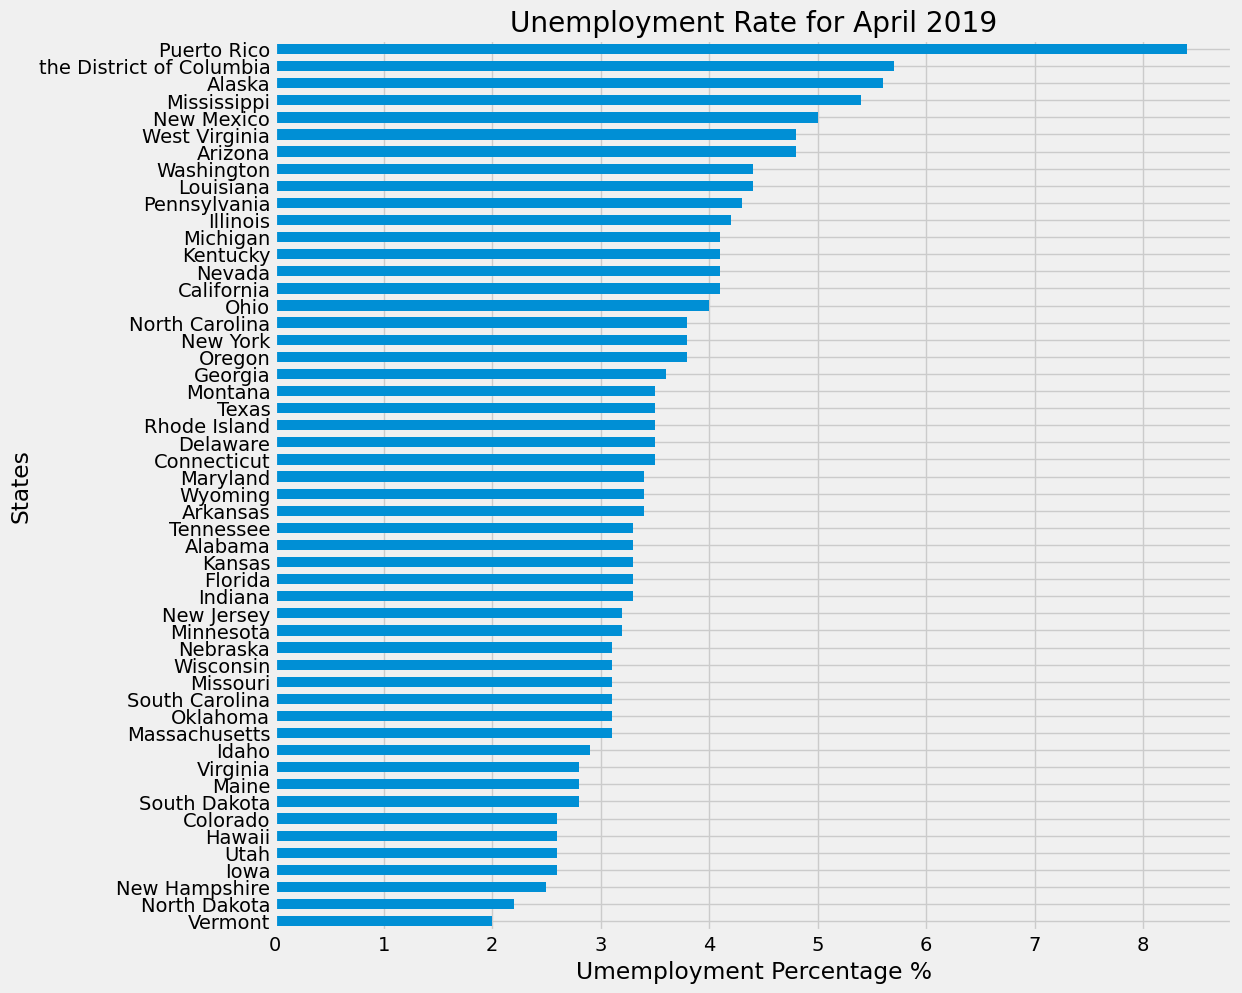

In [228]:
ax = umemployment_state.loc[umemployment_state.index == '2019-04-01'].T \
  .sort_values('2019-04-01') \
  .plot(figsize=(11, 11), width=0.6, kind="barh", title="Unemployment Rate for April 2019")
ax.legend().remove()
ax.set_xlabel("Umemployment Percentage %")
ax.set_ylabel("States")
plt.show()

# Pull the data for Participation rate

In [229]:
particaption_rate = fred.search("participation rate state", filter=("frequency", "Monthly"))
particaption_rate = particaption_rate.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'")

In [231]:
particaption_state = particaption_rate['title'].str.replace("Labor Force Participation Rate for ", "").to_dict()

In [233]:
particaption_data = []

for id in particaption_rate.index:
  results = fred.get_series(id)
  results = results.to_frame(name=id)
  particaption_data.append(results)

particaption_datas = pd.concat(particaption_data, axis=1)

In [235]:
particaption_datas.columns = [particaption_state[i] for i in particaption_datas.columns]

## Plot the data of Participation Rate of Women & Men for Year 2018-2020

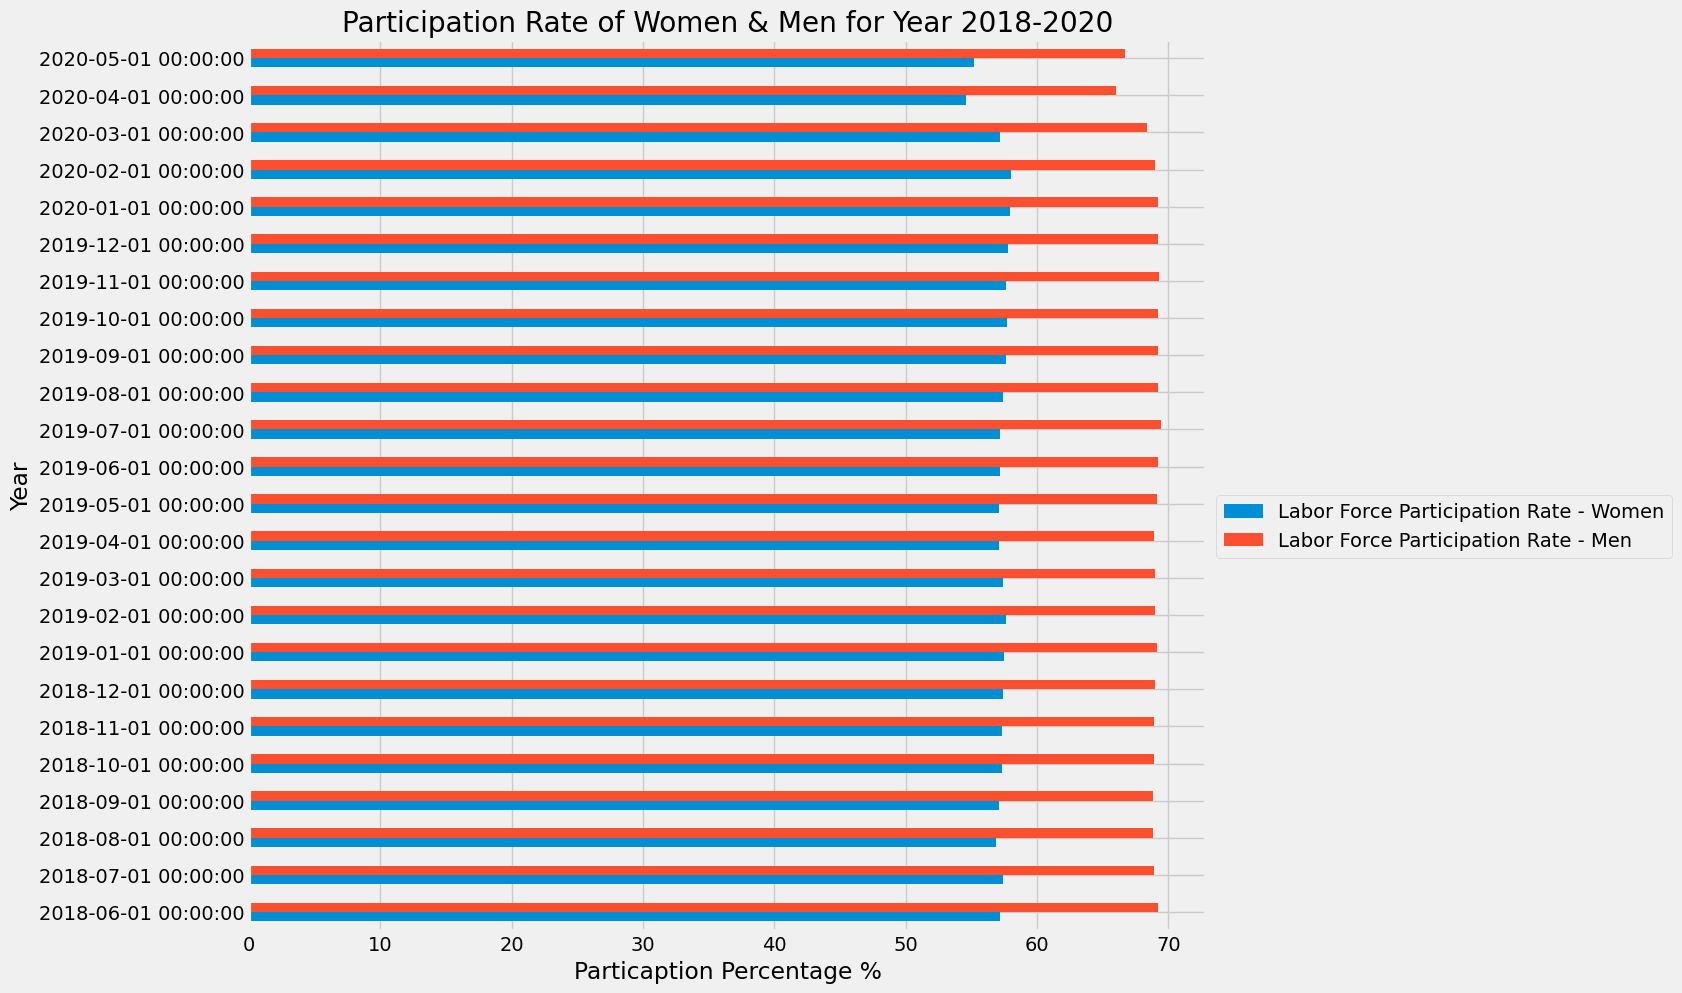

In [237]:
ax = particaption_datas.loc[(particaption_datas.index > '2018-05-01') & (particaption_datas.index <= '2020-05-01'), ['Labor Force Participation Rate - Women', 'Labor Force Participation Rate - Men']] \
    .plot(kind="barh", figsize=(11, 11), title="Participation Rate of Women & Men for Year 2018-2020")

ax.legend(bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel("Particaption Percentage %")
ax.set_ylabel("Year")
plt.show()


# Unemployment Vs Participation

In [238]:
umemployment_state.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'Illinois', 'North Carolina',
       'New Jersey', 'Georgia', 'Wisconsin', 'Arizona', 'Colorado', 'Virginia',
       'New Mexico', 'Kentucky', 'Tennessee', 'South Carolina', 'Washington',
       'Maryland', 'Minnesota', 'West Virginia', 'Oregon', 'Nevada',
       'Oklahoma', 'Arkansas', 'Utah', 'Alaska', 'Hawaii', 'Puerto Rico',
       'Missouri', 'Iowa', 'Louisiana', 'Indiana', 'North Dakota', 'Montana',
       'the District of Columbia', 'Connecticut', 'Maine', 'Nebraska',
       'Mississippi', 'New Hampshire', 'Idaho', 'Rhode Island', 'Delaware',
       'Kansas', 'Wyoming', 'Vermont', 'South Dakota'],
      dtype='object')

In [239]:
umemployment_state.rename(columns={"the District of Columbia": "District of Columbia"}, inplace=True)

<ipython-input-239-b4c1a1bac7c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umemployment_state.rename(columns={"the District of Columbia": "District of Columbia"}, inplace=True)


In [240]:
umemployment_state.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'Illinois', 'North Carolina',
       'New Jersey', 'Georgia', 'Wisconsin', 'Arizona', 'Colorado', 'Virginia',
       'New Mexico', 'Kentucky', 'Tennessee', 'South Carolina', 'Washington',
       'Maryland', 'Minnesota', 'West Virginia', 'Oregon', 'Nevada',
       'Oklahoma', 'Arkansas', 'Utah', 'Alaska', 'Hawaii', 'Puerto Rico',
       'Missouri', 'Iowa', 'Louisiana', 'Indiana', 'North Dakota', 'Montana',
       'District of Columbia', 'Connecticut', 'Maine', 'Nebraska',
       'Mississippi', 'New Hampshire', 'Idaho', 'Rhode Island', 'Delaware',
       'Kansas', 'Wyoming', 'Vermont', 'South Dakota'],
      dtype='object')

In [241]:
particaption_datas.dropna(inplace=True)

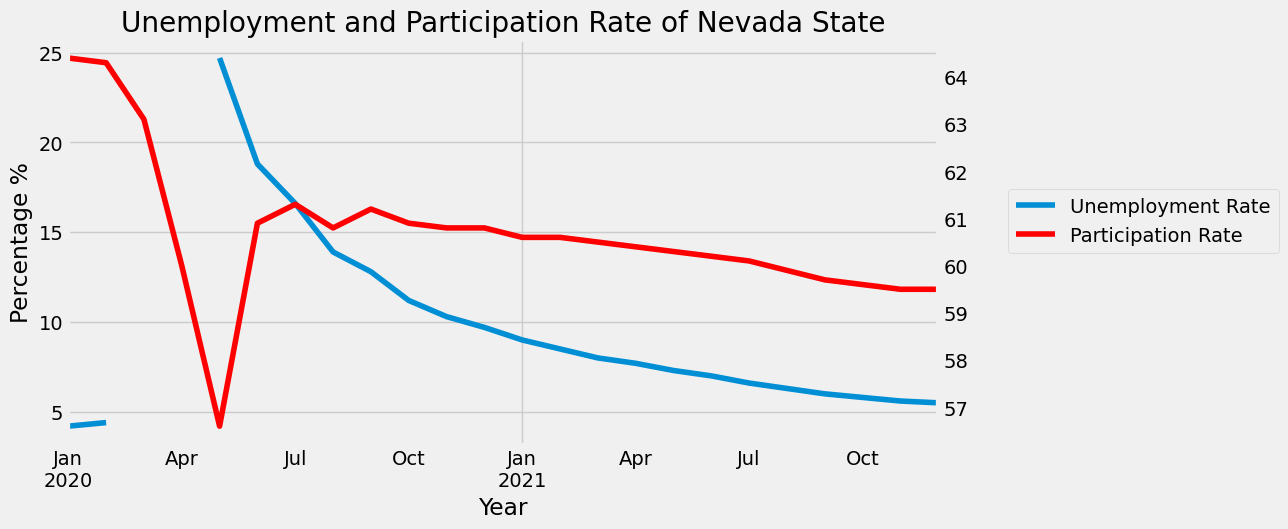

In [251]:
state = 'Nevada'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
umemployment_state2 = umemployment_state.asfreq('MS')
l1 = umemployment_state2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = particaption_datas.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color="red")
ax2.grid(False)
ax.set_title(f"Unemployment and Participation Rate of {state} State")
fig.legend(labels=["Unemployment Rate", "Participation Rate"], bbox_to_anchor=(1.3, 0.6))
ax.set_ylabel("Percentage %")
ax.set_xlabel("Year")
plt.show()


KeyError: 'District of Columbia'

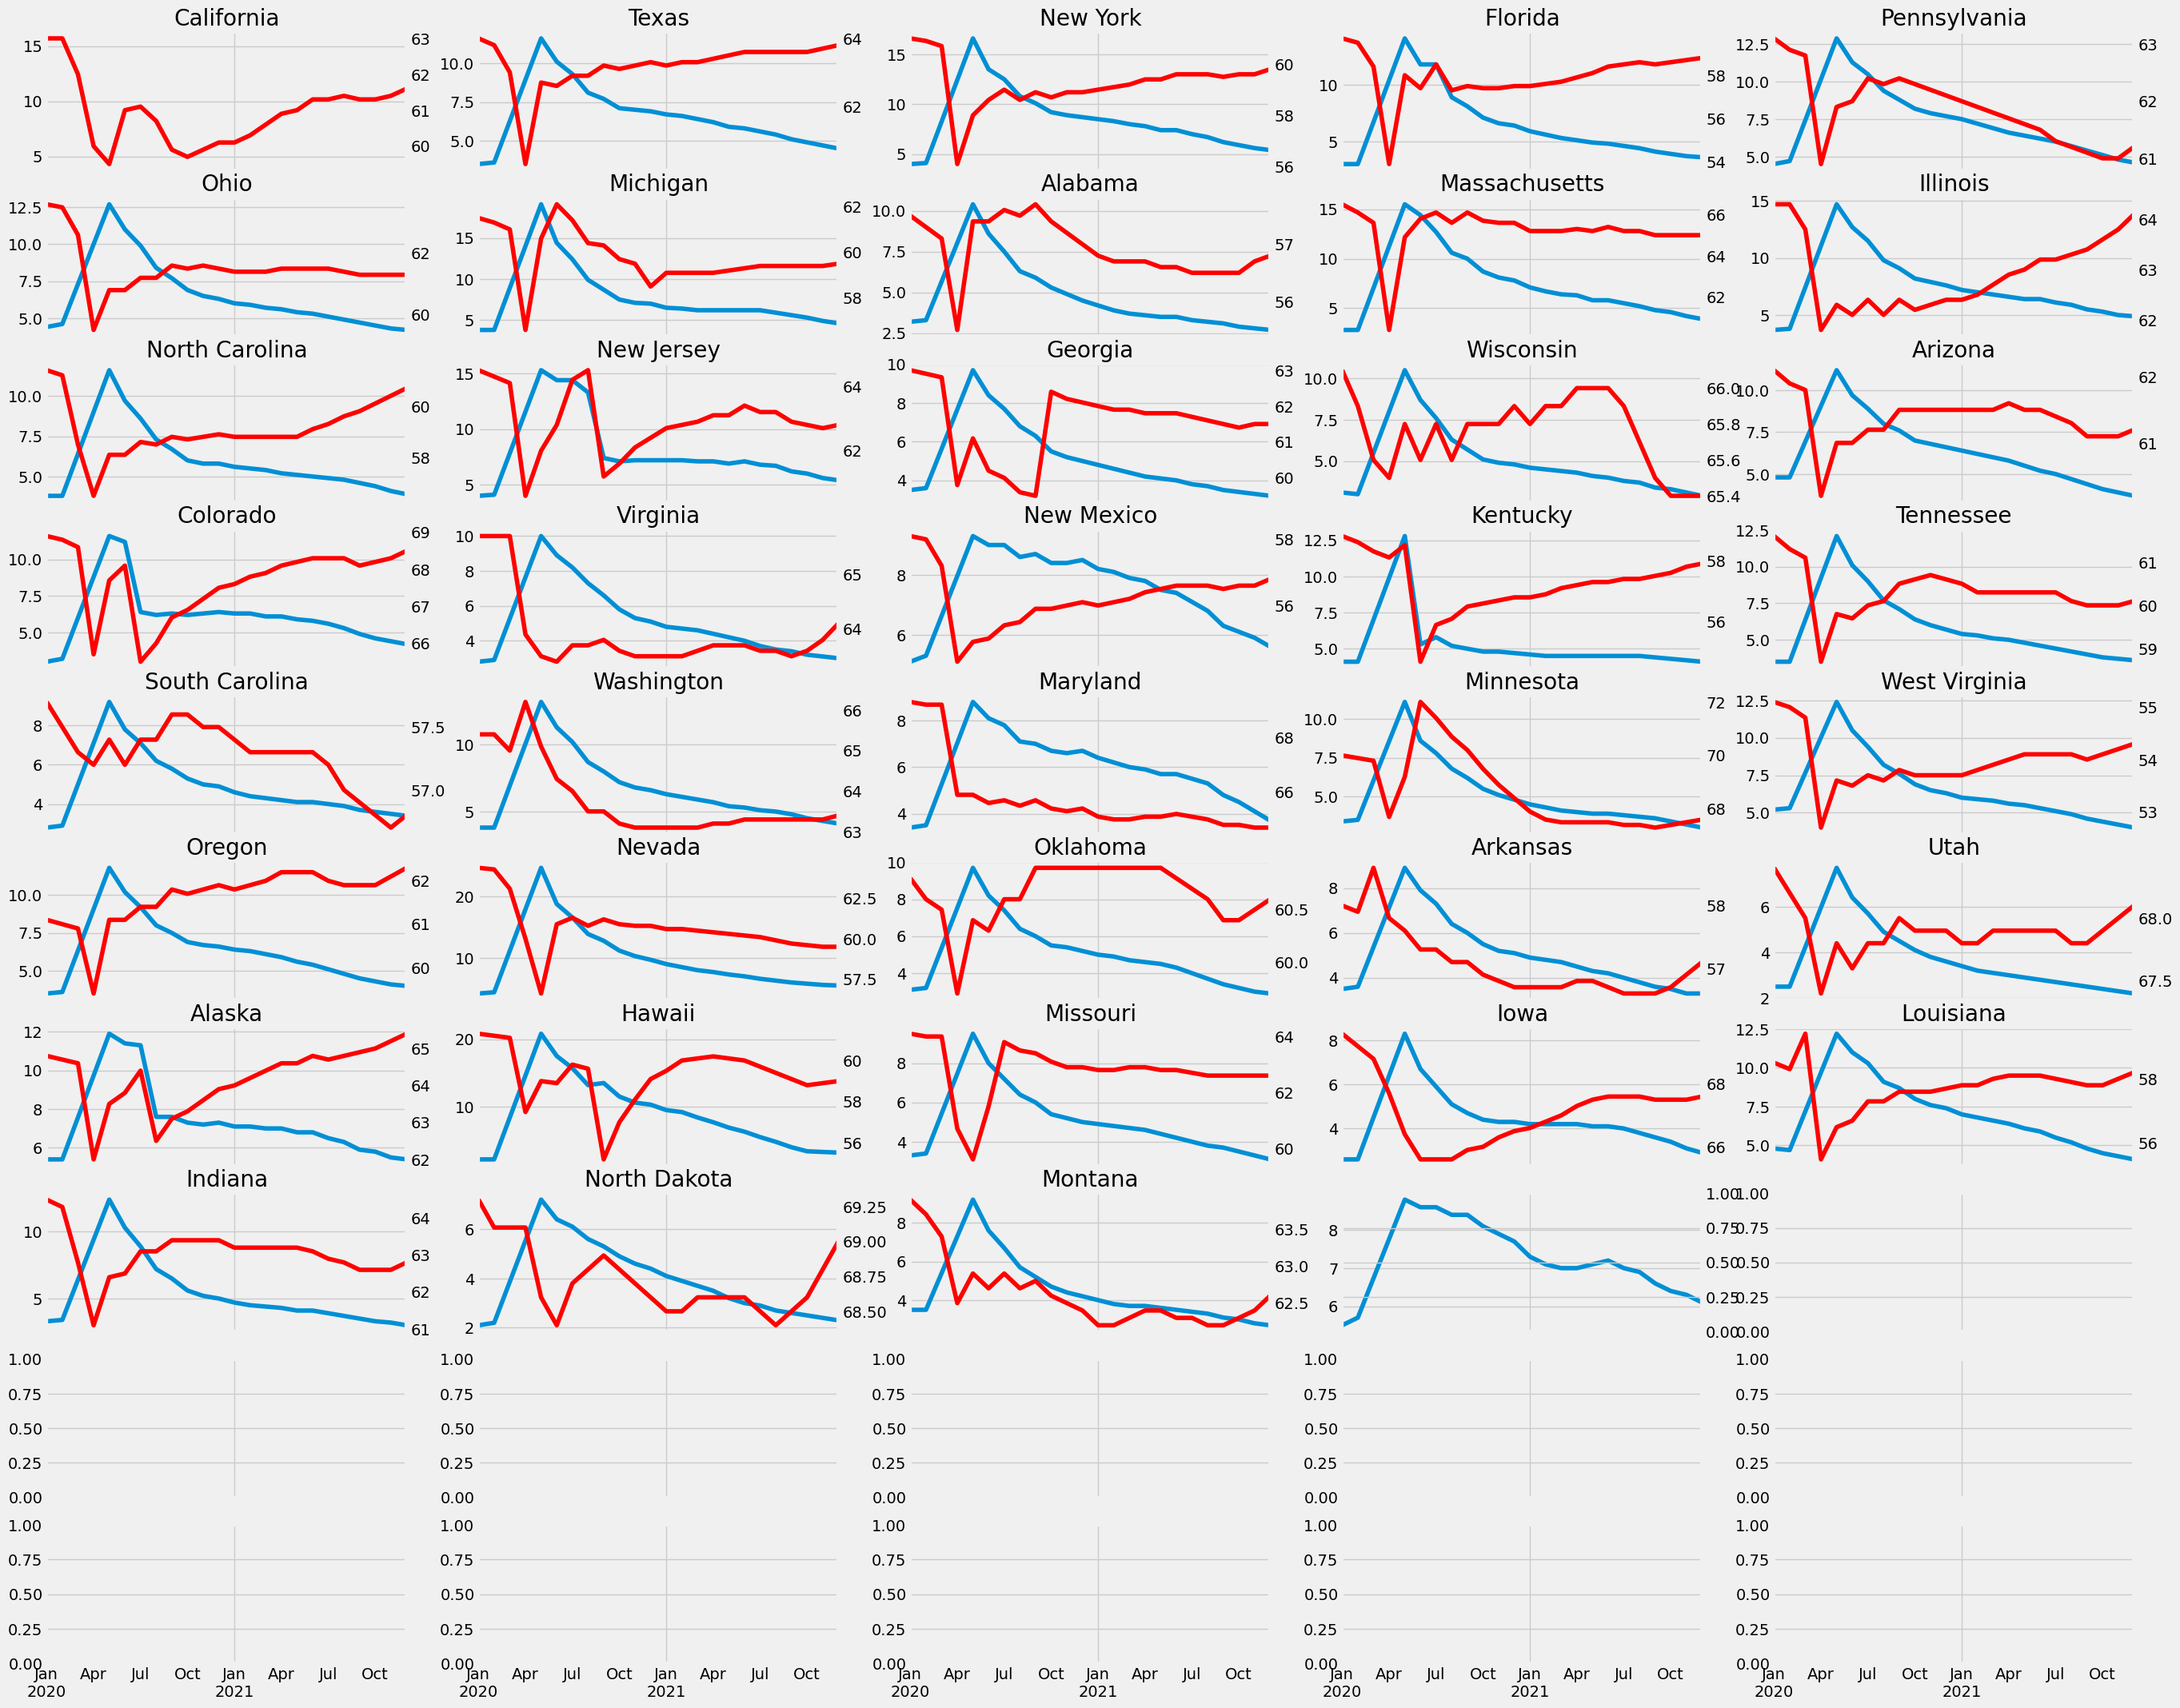

In [253]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in umemployment_state.columns:
    if state in ["District Of Columbia", "Puerto Rico"]:
        continue
    else:
      ax2 = axs[i].twinx()
      umemployment_state.query('index >= 2020 and index < 2022')[state] \
          .plot(ax=axs[i], label='Unemployment')
      particaption_datas.query('index >= 2020 and index < 2022')[state] \
          .plot(ax=ax2, label='Participation', color="red")
      ax2.grid(False)
      axs[i].set_title(state)
      i += 1
plt.tight_layout()
plt.show()